# Sarcasm Detection CNN

Let's build a model capable of detecting whether texts are sarcastic or not.

### Imports

In [13]:
import json
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import matplotlib.pyplot as plt

### Data download & pre-processing

In [6]:
# Load the JSON file
with open("/Applications/AI/tensor_flow_cert/tensor_flow_1/C3/W3/ungraded_labs/sarcasm.json", 'r') as f:
    datastore = json.load(f)

# Initialize the lists
sentences = []
labels = []

# Collect sentences and labels into the lists
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

Split data into train / test.

In [7]:
training_size = 20000

# Split the sentences
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

# Split the labels
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

Now we pre-process.

In [8]:
vocab_size = 10000
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate the word index dictionary
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Generate and pad the training sequences
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Generate and pad the testing sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Convert the labels lists into numpy arrays
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

### Build and Compile Model

In [10]:
# Parameters
embedding_dim = 16
filters = 128
kernel_size = 5
dense_dim = 6

# Build model
model_conv = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(filters, kernel_size, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile model
model_conv.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print model summary
model_conv.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           160000    
                                                                 
 conv1d (Conv1D)             (None, 116, 128)          10368     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 6)                 774       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 171,149
Trainable params: 171,149
Non-trainable params: 0
__________________________________________________

### Train the Model

In [11]:

history_conv = model_conv.fit(training_padded, training_labels, epochs=10, validation_data=(testing_padded, testing_labels))

Epoch 1/10


2023-09-21 15:58:16.065714: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


625/625 [==============================] - 3s 4ms/step - loss: 0.4484 - accuracy: 0.7769 - val_loss: 0.3575 - val_accuracy: 0.8419
Epoch 2/10
625/625 [==============================] - 3s 4ms/step - loss: 0.2323 - accuracy: 0.9083 - val_loss: 0.3737 - val_accuracy: 0.8430
Epoch 3/10
625/625 [==============================] - 3s 5ms/step - loss: 0.1254 - accuracy: 0.9552 - val_loss: 0.4314 - val_accuracy: 0.8465
Epoch 4/10
625/625 [==============================] - 3s 5ms/step - loss: 0.0588 - accuracy: 0.9811 - val_loss: 0.5530 - val_accuracy: 0.8401
Epoch 5/10
625/625 [==============================] - 3s 5ms/step - loss: 0.0248 - accuracy: 0.9937 - val_loss: 0.6781 - val_accuracy: 0.8340
Epoch 6/10
625/625 [==============================] - 4s 6ms/step - loss: 0.0104 - accuracy: 0.9976 - val_loss: 0.7804 - val_accuracy: 0.8353
Epoch 7/10
625/625 [==============================] - 4s 6ms/step - loss: 0.0045 - accuracy: 0.9991 - val_loss: 0.8727 - val_accuracy: 0.8362
Epoch 8/10
625/62

### Visualise Results

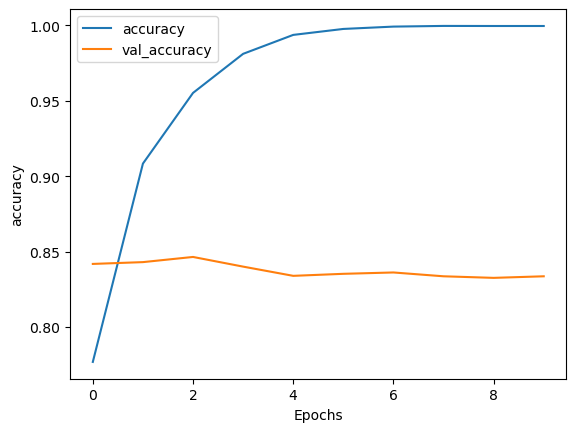

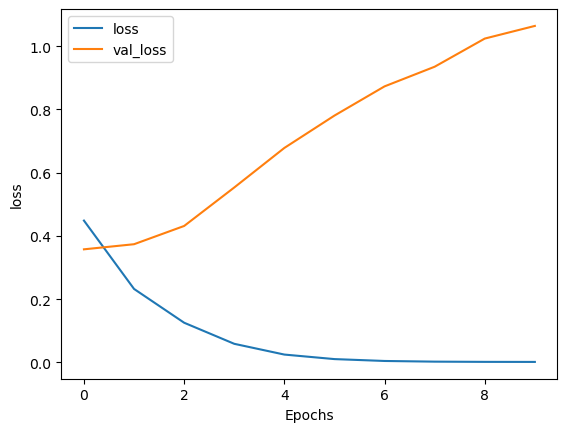

In [14]:
def plot_graphs(history, string):
  '''Function to plot training / validation loss / accuracy'''
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss history
plot_graphs(history_conv, 'accuracy')
plot_graphs(history_conv, 'loss')

We achieve a reasonable 85% accuracy but there are problems with our model. As epochs go by, traiing accuracy increases whilst validation accuracy stalls and even decreases - this is due to overfitting. To prevent this we could tune the learning rate, or look at using bigger data.